#  E-Commerce 상품 추천

## 1. 들어가며

![알라딘.png](./images/알라딘.png)

- 개인정보를 남기고 싶지 않아 시크릿모드를 열고 로그인을 하지 않은 상태로 온라인 서점 ['알라딘'](https://www.aladin.co.kr/home/welcome.aspx)에 접속
- 그런데 클릭한 책들이 *오늘 본 상품*에 기록되고 있었고 책 상세페이지 영역에 다른 책들을 추천하고 있음

![아마존.png](./images/아마존.png)
- [아마존](https://www.amazon.com/) 역시 마찬가지였음
- 시크릿 모드를 켜놓고 캠을 사기위해 이것저것 서핑하고 보니 어느새 탐색 내역이 기록되어 있었고, 이를 바탕으로 한 추천을 해주고 있었음

### **1. Session-Based Recommendation**

- 전자상거래 플랫폼에서 많이 활용하고 있는 Session-Based Recommendation
- 고객에게 그 고객과 유사한 다른 고객이 좋아하는 상품을 추천해 주는 전략은 언제나 유효할까?
- 이런 추천 전략에서의 기본 전제에는 1가지 맹점이 있음
- 고객의 선호가 고정된 것이라고 보는 것
- 그러나 고객의 마음은 늘 변덕스럽기 마련
- 그래서 전자상거래 플랫폼에서는 '바로 지금 시점에 이 고객이 좋아할 만한 상품'을 추천해 주고 싶음
- 그렇다면 이 고객이 바로 지금 좋아할만한 것을 알아낼 단서는 어디에 있을까?

- **"Session-Based Recommendation"**은 말 그대로 세션 데이터를 기반으로 **유저가 다음에 클릭 또는 구매할 아이템을 예측하는 추천**
    - Session이란 앞에서 살펴보았듯이 유저가 서비스를 이용하면서 발생하는 중요한 정보를 담은 데이터를 말하며, 서버 쪽에 저장됨
- 유저의 행동 데이터들은 유저 측 브라우저를 통해 쿠키의 형태로 저장되는데 쿠키는 세션과 상호작용하면서 정보를 주고 받음
- 여기에서는 세션을 **브라우저가 종료되기 전까지 유저의 행동을 담은 시퀀스 데이터**와 같은 의미로 사용
- 자세한 내용은 참고자료를 확인
    - [1. 쿠키, 세션, 캐시가 뭔가요?](https://www.youtube.com/watch?v=OpoVuwxGRDI&ab_channel=%EC%96%84%ED%8C%8D%ED%95%9C%EC%BD%94%EB%94%A9%EC%82%AC%EC%A0%84)
        - Cookie: 사이트를 이용하고 방문할 때 브라우저에 저장되는 내용들. 유저가 갖고 있는 정보들
            - 한계? 유저가 임의로 고치거나 지울 수 있고 남이 훔쳐볼 수 있음. 민감하거나 중요한 정보의 경우 불안함
        - Session: 사용자가 다른 누군가에게 노출되어서는 안 되는, 서비스 제공자가 직접 관리해야 할 정보들은 세션으로 서버 안에서 다뤄짐
        - Cache: 웹 뿐만 아니라 컴퓨터의 메모리 부분이나 안드로이드 등 다양한 곳에서 쓰임. 공통적인 의미로, 가져오는데 비용이 드는 데이터를 한 번 가져온 뒤에는 임시로 저장해두는 것. 이미지 등의 정보를 불러올 때, 데이터 사용량도 발생하고 시간도 들기 때문에 사용자가 여러 번 방문할 법한 사이트에서는 1번 받아온 데이터를 사용자의 컴퓨터 또는 중간 역할을 하는 서버에 저장해두는 것
    - [2. 쿠키, 세션이란?](https://chrisjune-13837.medium.com/web-%EC%BF%A0%ED%82%A4-%EC%84%B8%EC%85%98%EC%9D%B4%EB%9E%80-aa6bcb327582)

- 아래와 같은 데이터가 예시
- **9194111** Session의 유저가 8분여에 걸쳐 4개의 아이템(**214853420, 214850942, 214829878, 214853420**)을 본 상황
- 유저가 **214853420** 아이템을 보았을 때, **214850492**을 추천하고 이어서 **214850942**를 보았을 때, **214829878**을 추천하고 싶음
![session_based_recommendation.png](./images/session_based_recommendation.png)
- 추천 시스템을 다루는 학회 RecSys에서는 매년 추천을 주제로 대회를 개최
- 2015년도에는 [YOOCHOOSE](https://www.yoochoose.com/)라는 추천 엔질 솔루션 회사에서 [E-Commerce 데이터](https://webcache.googleusercontent.com/search?q=cache:Npc6PQ3mzngJ:https://recsys.acm.org/recsys15/challenge/+&cd=1&hl=en&ct=clnk&gl=kr)를 공개했음
- 이번 노드에서는 이 데이터를 활용

- 프로젝트 폴더 만들고, 데이터 폴더에서 프로젝트 폴더로 링크 연결해주기
![cmd.png](./images/cmd.png)

In [1]:
# 데이터 설명(Readme) 읽어 보기
import os
f = open(os.getenv('HOME') + '/aiffel/yoochoose/data/dataset-README.txt', 'r')
while True:
    line = f.readline()
    if not line:break
    print(line)
f.close()

﻿SUMMARY




This dataset was constructed by YOOCHOOSE GmbH to support participants in the RecSys Challenge 2015.

See  http://recsys.yoochoose.net for details about the challenge.



The YOOCHOOSE dataset contain a collection of sessions from a retailer, where each session

is encapsulating the click events that the user performed in the session.

For some of the sessions, there are also buy events; means that the session ended

with the user bought something from the web shop. The data was collected during several

months in the year of 2014, reflecting the clicks and purchases performed by the users

of an on-line retailer in Europe.  To protect end users privacy, as well as the retailer,

all numbers have been modified. Do not try to reveal the identity of the retailer.



LICENSE


This dataset is licensed under the Creative Commons Attribution-NonCommercial-NoDerivatives 4.0

International License. To view a copy of this license, visit http://creativecommons.org/licenses/by-nc-nd

- 데이터 설명을 읽어보면 몇 가지 주목할만한 점이 있음
    - 1. 유저에 대한 정보를 전혀 알 수 없음(성별, 나이, 장소, 마지막 접속 날짜, 이전 구매 내역 등등)
    - 2. 아이템에 대한 정보도 전혀 알 수 없음(실제로 어떤 물건인지, 사진이나 설명, 가격) <br>


- 이와 달리 유저에 대한 정보를 알 수 있는 경우는 보통 **Sequential Recommendation**라고 구별해서 부르기도 함
- 유저와 아이템의 추가 정보를 Sequential Recommendation 모델에 적용하는 분야는 **Context-Aware**라는 키워드로 활발히 연구되고 있음
- 또한, E-Commerce 데이터의 경우 다음과 같은 특징을 갖음
    - 1. 비로그인 상태로 탐색하는 유저가 많음
    - 2. 로그인 상태로 탐색한다고 할지라도 접속할 때 마다 탐색하는 의도가 뚜렷하게 다름
- 즉, 마우스를 사야겠다고 마음머고 탐색한 이력이 칫솔을 사야겠다 생각하고 탐색하는 경우에 도움이 되지 않음

## 2. Data Preprocess

### 2-1. Data Load
- 데이터를 불러와 살펴보고 주요 통계치들 살펴보기
- 이번 자료에서는 Click 데이터에 있는 Session Id, TimeStamp, ItemID 칼럼만 사용
- pathlib 라이브러리에 대한 내용은 [이쪽](https://brownbears.tistory.com/415#:~:text=pathlib%20%EC%84%A4%EB%AA%85,%EB%A1%9C%20%EB%8B%A4%EB%A3%A8%EC%9E%90%EB%8A%94%20%EA%B2%83%EC%9E%85%EB%8B%88%EB%8B%A4.&amp;text=pathlib%EC%9D%80%20%EC%8A%AC%EB%9E%98%EC%8B%9C(/)%EA%B0%80,%EC%A7%81%EA%B4%80%EC%A0%81%EC%9C%BC%EB%A1%9C%20%EC%9D%B4%ED%95%B4%ED%95%A0%20%EC%88%98%20%EC%9E%88%EC%8A%B5%EB%8B%88%EB%8B%A4.)을 참고

In [2]:
import datetime as dt
from pathlib import Path
import os

import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [3]:
data_path = Path(os.getenv('HOME') + '/aiffel/yoochoose/data')
train_path = data_path / 'yoochoose-clicks.dat'
train_path

PosixPath('/aiffel/aiffel/yoochoose/data/yoochoose-clicks.dat')

In [4]:
def load_data(data_path: Path, nrows = None):
    data = pd.read_csv(data_path, sep = ',', header = None, usecols = [0, 1, 2],
                       parse_dates = [1], dtype = {0: np.int32, 2:np.int32}, nrows = nrows)
    data.columns = ['SessionId', 'Time', 'ItemId']
    return data

In [5]:
# 시간이 좀 걸릴 수 있음
# 메모리도 10GB 가까이 소요될 수 있으니 메모리 상태에 주의
data = load_data(train_path, None)
# data를 id와 시간 순서로 정렬
data.sort_values(['SessionId', 'Time'], inplace = True)
data

,SessionId,Time,ItemId
0,1,2014-04-07 10:51:09.277000+00:00,214536502
1,1,2014-04-07 10:54:09.868000+00:00,214536500
2,1,2014-04-07 10:54:46.998000+00:00,214536506
3,1,2014-04-07 10:57:00.306000+00:00,214577561
4,2,2014-04-07 13:56:37.614000+00:00,214662742
...,...,...,...
32230487,11562158,2014-09-26 04:50:29.172000+00:00,214849132
32230488,11562158,2014-09-26 04:52:21.900000+00:00,214854774
32230489,11562158,2014-09-26 05:16:32.904000+00:00,214849132
32230490,11562159,2014-09-26 19:16:28.897000+00:00,214849132


- 추천시스템을 구축할 때 가장 먼저 확인해 볼 것은 유저수(세션 수)와 아이템 수

In [6]:
data['SessionId'].nunique(), data['ItemId'].nunique()

(9249729, 52739)

- 세션의 숫자가 약 900만 개, 아이템 숫자는 약 5만 개가 됨
- 이 수치가 유저의 수가 900만명이라는 것은 아님
- 같은 유저가 여러 개의 세션을 만들 수도 있기 때문

### 2.2 Session Length
- 각 세션이 대략 몇 개의 클릭 데이터 갖고 있는지 살펴보기

In [7]:
session_length = data.groupby('SessionId').size()
session_length

SessionId
1           4
2           6
3           3
4           2
6           2
           ..
11562156    2
11562157    2
11562158    3
11562159    1
11562161    1
Length: 9249729, dtype: int64

- 'session_length'란 같은 'SessionId'를 공유하는 데이터 row의 개수 의미
- 여기서 'SessionId'란 브라우저에서 웹서버로 접속할 때 항상 포함하게 되는 유저 구분자
- 로그인하지 않았기 때문에 이 사용자가 누군지는 알 수 없어도, 최소한 특정 사용자의 행동을 'SessionId' 기준으로 모아서 분류해낼 수는 있음
- 따라서 여기서 'session_length'란 해당 세션의 사용자가 그 세션 동안 몇번의 액션을 취했는지(몇개의 상품 정보를 클릭했는지)의 의미가 됨

In [8]:
session_length.median(), session_length.mean()

(2.0, 3.568098481587947)

In [9]:
session_length.min(), session_length.max()

(1, 200)

In [10]:
session_length.quantile(0.999)

41.0

- 각 세션의 길이는 보통 2-3 정도
- 온라인에서 쇼핑할 때를 생각해보면 이 수치가 그럴듯하게 느껴짐
- 99.9% 세션은 길이가 41이하
- 길이가 200인 뭔가 이상
- 하나를 잡고 살펴보기

In [11]:
long_session = session_length[session_length == 200].index[0]
data[data['SessionId']==long_session]

,SessionId,Time,ItemId
580293,189448,2014-04-01 08:56:28.983000+00:00,214830392
580294,189448,2014-04-01 08:56:31.815000+00:00,214830392
580295,189448,2014-04-01 08:57:08.301000+00:00,214830392
580296,189448,2014-04-01 08:57:10.338000+00:00,214830392
580297,189448,2014-04-01 08:58:01.728000+00:00,214830390
...,...,...,...
580488,189448,2014-04-01 10:35:52.400000+00:00,214830137
580489,189448,2014-04-01 10:37:15.094000+00:00,214830118
580490,189448,2014-04-01 10:37:35.955000+00:00,214830118
580491,189448,2014-04-01 10:37:37.098000+00:00,214830118


- 매우 짧은 간격으로 지속적으로 클릭을 1시간 30분 가량 지속하고 있음
- 유저들의 서비스 이용행태는 다양하기 때문에 데이터 전처리를 어떻게 할지는 모델을 만드는 사람이 판단해야 함
- e.g)음악 데이터의 경우, 어떤 사람은 하루종일 랜덤재생을 할 수도 있음. 이 유저의 데이터를 그대로 사용하는게 좋을까?
- e.g) 어떤 상품의 경우 1분 내에 20명이 10점을 주고 나갈 수도 있음. 상품을 팔기 위해 조작하고 있는 건 아닐까?
- 너무 긴 세션을 제거할 수도 있고 포함시킬 수도 있음
- 어떻게 하면 좋을지 판단해보기
- 세션 길이에 대한 감을 더 잘 파악하기 위해 시각화
- 아래 코드는 세션길이 기준 하위 99.9%까지의 분포 누적합을 시각화한 것

In [12]:
length_count = session_length.groupby(session_length).size()
length_percent_cumsum = length_count.cumsum() / length_count.sum()
length_percent_cumsum_999 = length_percent_cumsum[length_percent_cumsum < 0.999]

length_percent_cumsum_999

1     0.136189
2     0.520858
3     0.695280
4     0.796461
5     0.855125
6     0.894389
7     0.920036
8     0.938321
9     0.951293
10    0.961084
11    0.968267
12    0.973959
13    0.978320
14    0.981815
15    0.984587
16    0.986837
17    0.988673
18    0.990201
19    0.991460
20    0.992520
21    0.993436
22    0.994207
23    0.994871
24    0.995444
25    0.995920
26    0.996342
27    0.996714
28    0.997042
29    0.997330
30    0.997577
31    0.997796
32    0.998001
33    0.998177
34    0.998327
35    0.998461
36    0.998590
37    0.998706
38    0.998805
39    0.998896
40    0.998981
dtype: float64

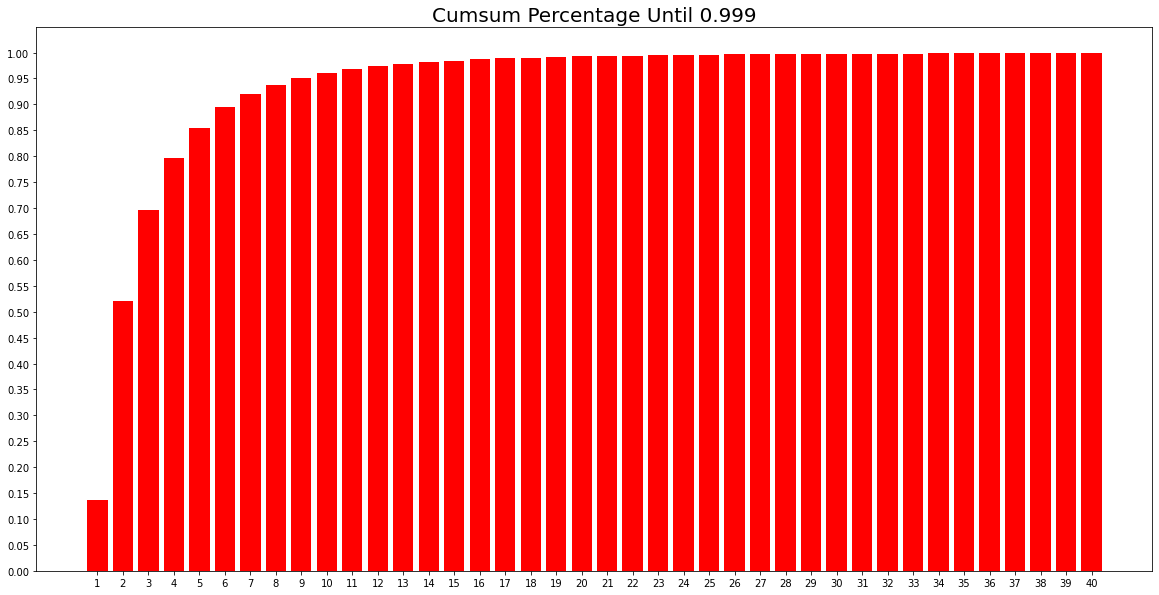

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize = (20, 10))
plt.bar(x = length_percent_cumsum_999.index,
        height = length_percent_cumsum_999, color = 'red')
plt.xticks(length_percent_cumsum_999.index)
plt.yticks(np.arange(0, 1.01, 0.05))
plt.title('Cumsum Percentage Until 0.999', size = 20)
plt.show()

- Q1. 추천시스템은 유저-상품 관계 매트릭스를 유저 행렬과 상품 행렬의 곱으로 표현하는 Matrix Factorization 모델을 널리 사용. 그렇다면 이 데이터도 유저와 클릭한 상품정보 관계에 대해 Matrix Factorization을 사용하면 어떨까?
- A1. User * Item Matrix의 빈칸이 너무 많아서(data sparsity) 모델이 제대로 학습되지 않을 가능성이 있음. 이 세션정보는 유저를 ID 기반으로 정리할 수 없기 때문에 세션 하나를 유저 하나로 본다면 기존의 유저-상품정보 Matrix보다 훨씬 sparse한 형태가 됨

### 2.3 Session Time
- 어떤 유저가 아이폰 구매하려고 함. 2020년 5월에는 아이폰 SE2를 구매하려는 사람 많을 것
- 그러나 그로부터 몇달 후면 아이폰 12의 구매량이 엄청나게 증가하게 될 것
- 영화나 드라마 역시 마찬가지. 유저들의 소비 패턴은 금방금방 변함
- 이런 이유 때문에 추천시스템을 구축할 때에는 최근 소비 트렌드를 학습하는 것이 중요. 이번에는 데이터가 발생한 시간에 대해 알아보기

- Q2. 추천 시스템에서 다루는 시간 관련 데이터는 다양한 측면이 있음. 데이터 생성 날짜 말고 또 어떤 요소가 있을까?
- A2. 접속하는 시간대(오전, 오후, 새벽), 접속해 있는 시간, 접속하는 요일, 계절, 마지막 접속 시간, 장바구니에 넣고 지난 시간 등등

- 다루려는 데이터의 시간 관련 정보 확인해 보기

In [14]:
oldest, latest = data['Time'].min(), data['Time'].max()
print(oldest)
print(latest)

2014-04-01 03:00:00.124000+00:00
2014-09-30 02:59:59.430000+00:00


- 데이터 설명대로 6개월치 데이터가 있음
- 이번 노드에서는 1달치 데이터만 사용하려고 함. 6개월치 데이터를 사용하면 성능이 더 좋아지는가

In [15]:
type(latest)

pandas._libs.tslibs.timestamps.Timestamp

- latest는 Timestamp의 객체이기 때문에, int 객체와의 사칙연산을 지원하지 않음
- 날짜끼리 차이 구하고 싶을 때는 datetime 라이브러리의 timedelta 객체 사용

In [16]:
# 최종 날짜로부터 30일 이전 날짜 구하기
month_ago = latest - dt.timedelta(30)
# 방금 구한 날짜 이후의 데이터만 모으기
data = data[data['Time'] > month_ago]
data

,SessionId,Time,ItemId
26837834,9194111,2014-08-31 17:40:46.805000+00:00,214853420
26837835,9194111,2014-08-31 17:42:26.089000+00:00,214850942
26837836,9194111,2014-08-31 17:44:06.583000+00:00,214829878
26837837,9194111,2014-08-31 17:48:49.873000+00:00,214853420
26838214,9194112,2014-09-01 13:26:36.292000+00:00,214853422
...,...,...,...
32230487,11562158,2014-09-26 04:50:29.172000+00:00,214849132
32230488,11562158,2014-09-26 04:52:21.900000+00:00,214854774
32230489,11562158,2014-09-26 05:16:32.904000+00:00,214849132
32230490,11562159,2014-09-26 19:16:28.897000+00:00,214849132


### 2.4 Data Cleansing

- 2.2에서 살펴보니 길이가 1인 세션도 꽤 있음
- 목적은 유저가 최소 1개 이상 클릭했을 때 다음 클릭 예측하는 것이므로 길이가 1인 세션은 제거
- 너무 적게 클릭된 아이템은 이상한 아이템일 가능성이 있음
- 이 역시 제거해줌

In [17]:
# short_session을 제거한 다음, unpopular item을 제거하면 다시 길이가 1인 session이 생길 수 있음
# 이를 위해 반복문 통해 지속적으로 제거
def cleanse_recursive(data: pd.DataFrame, shortest, least_click) -> pd.DataFrame:
    while True:
        before_len = len(data)
        data = cleanse_short_session(data, shortest)
        data = cleanse_unpopular_item(data, least_click)
        after_len = len(data)
        if before_len == after_len:
            break
        return data

def cleanse_short_session(data: pd.DataFrame, shortest):
    session_len = data.groupby('SessionId').size()
    session_use = session_len[session_len >= shortest].index
    data = data[data['SessionId'].isin(session_use)]
    return data

def cleanse_unpopular_item(data: pd.DataFrame, least_click):
    item_popular = data.groupby('ItemId').size()
    item_use = item_popular[item_popular >= least_click].index
    data = data[data['ItemId'].isin(item_use)]
    return data

In [18]:
data = cleanse_recursive(data, shortest = 2, least_click = 5)
data

,SessionId,Time,ItemId
26837834,9194111,2014-08-31 17:40:46.805000+00:00,214853420
26837835,9194111,2014-08-31 17:42:26.089000+00:00,214850942
26837836,9194111,2014-08-31 17:44:06.583000+00:00,214829878
26837837,9194111,2014-08-31 17:48:49.873000+00:00,214853420
26838202,9194123,2014-08-31 19:26:57.386000+00:00,214601207
...,...,...,...
32230485,11562157,2014-09-25 12:31:10.391000+00:00,214580372
32230486,11562157,2014-09-25 12:31:29.679000+00:00,214516012
32230487,11562158,2014-09-26 04:50:29.172000+00:00,214849132
32230488,11562158,2014-09-26 04:52:21.900000+00:00,214854774


### 2.5 Train/Valid/Test split
- 모델 평가를 위해 Valid Set과 Test Set 만들어보기
- 대회에서 Test Set을 제공해주고 있음

In [19]:
test_path = data_path / 'yoochoose-test.dat'
test = load_data(test_path)
test['Time'].min(), test['Time'].max()

(Timestamp('2014-04-01 03:00:08.250000+0000', tz='UTC'),
 Timestamp('2014-09-30 02:59:23.866000+0000', tz='UTC'))

- Test셋을 살펴보니 Training 셋과 기간이 겹침
- 하지만 1.3에서 말했듯이 추천 시스템은 **지금** 잘 예측하는 게 중요
- 1달 전에 성능이 좋은 모델을 지금 쓰면 맞지 않을 수가 있는데, 사용자들의 소비 패턴이 달라지기 때문
- 이런 이유로 Session-Based Recommendation에서는 기간에 따라 Train/Valid/Test 셋을 나누기도 함
- 이번 자료에서는 가장 마지막 1일 기간 동안을 Test로, 2일 전부터 1일전 까지를 valid set 으로 나누기
![validation_test.png](./images/validation_test.png)

In [28]:
def split_by_date(data: pd.DataFrame, n_days:int):
    final_time = data['Time'].max()
    session_last_time = data.groupby('SessionId')['Time'].max()
    session_in_train = session_last_time[session_last_time < final_time - dt.timedelta(n_days)].index
    session_in_test = session_last_time[session_last_time >= final_time - dt.timedelta(n_days)].index
    
    before_date = data[data['SessionId'].isin(session_in_train)]
    after_date = data[data['SessionId'].isin(session_in_test)]
    after_date = after_date[after_date['ItemId'].isin(before_date['ItemId'])]
    return before_date, after_date

In [29]:
tr, test = split_by_date(data, n_days = 1)
tr, val = split_by_date(tr, n_days = 1)

In [30]:
# data에 대한 정보 살펴보기
def stats_info(data: pd.DataFrame, status:str):
    print(f'* {status} Set Stats Info\n'
          f'\t Events: {len(data)}\n'
          f'\t Sessions: {data["SessionId"].nunique()}\n'
          f'\t Items: {data["ItemId"].nunique()}\n'
          f'\t First Time: {data["Time"].min()}\n'
          f'\t Last Time: {data["Time"].max()}\n')

In [31]:
stats_info(tr, 'train')
stats_info(val, 'valid')
stats_info(test, 'test')

* train Set Stats Info
	 Events: 5129144
	 Sessions: 1247094
	 Items: 20275
	 First Time: 2014-08-31 03:00:01.111000+00:00
	 Last Time: 2014-09-28 02:57:34.348000+00:00

* valid Set Stats Info
	 Events: 58100
	 Sessions: 12372
	 Items: 6245
	 First Time: 2014-09-28 03:00:25.298000+00:00
	 Last Time: 2014-09-29 02:58:27.660000+00:00

* test Set Stats Info
	 Events: 71041
	 Sessions: 15319
	 Items: 6588
	 First Time: 2014-09-29 02:37:20.695000+00:00
	 Last Time: 2014-09-30 02:59:59.430000+00:00



In [34]:
# train set에 없는 아이템이 val, test기간에 생길 수 있으므로 train data를 기준으로 인덱싱
id2idx = {item_id: index for index, item_id in enumerate(tr['ItemId'].unique())}

def indexing(df, id2idx):
    # id2idx에 없는 아이템은 모르는 값(-1) 처리 해주기
    df['item_idx'] = df['ItemId'].map(lambda x:id2idx.get(x, -1))
    return df

tr = indexing(tr, id2idx)
val = indexing(val, id2idx)
test = indexing(test, id2idx)

- 이제 데이터 준비 마쳤음
- 데이터를 저장한 다음, data pipeline을 구축하는 단계로 넘어가기

In [35]:
save_path = data_path / 'processed'
save_path.mkdir(parents = True, exist_ok = True)

tr.to_pickle(save_path / 'train.pkl')
val.to_pickle(save_path / 'valid.pkl')
test.to_pickle(save_path / 'test.pkl')

## 3. 논문소개(GRU4REC)

- 사용할 모델은 2016년 ICLR에서 공개된 [SESSION-BASED RECOMMENDATIONS WITH RECURRENT NEURAL NETWEORKS](https://arxiv.org/pdf/1511.06939v4.pdf)
- Session Date에서는 처음으로 RNN 계열 모델을 적용하여 발표했음
- 모델 구조는 아래 그림처럼 간단함
- 여러 RNN 계열의 모델(e.g LSTM)이 있겠지만, 실험해본 결과 GRU의 성능이 제일 좋았음
- 또한 Embedding Layer를 사용하지 않았을 때가 사용했을 때보다 성능이 좋았다고 함
- 이번 노드에서도 Embedding Layer를 사용하지 않고 One-hot Encoding만 사용할 예정
![GRU.png](./images/GRU.png)

- 대신 추천 데이터의 특징 몇 가지를 살려 모델링을 했음

### **Session-Parallel Mini-Batches**:
- 위에서 보았듯이 Session의 길이는 매우 짧은 것들이 대부분
- 그러나 매우 긴 것들도 있음
- 이 세션들은 데이터 샘플 하나로 보고 mini-batch를 구성하여 input으로 넣는다면 길이가 젱ㄹ 긴 세션의 연산이 끝날 때까지 짧은 세션들이 기다려야 함
![session.png](./images/session.png)
- 위 그림에서 Session 1, 2, 3을 하나의 mini-batch로 만든다면, 이 미니배치의 연산은 Session 3의 연산이 끝나야 끝나는 식
- 논문의 저자는 대신 Session-Parallel Mini-Batches를 제안
- 이럼처럼 Session이 끝날 때까지 기다리지 않고 병렬적으로 계산하자는 뜻
- 아래 그램에서 session2가 끝나면 session4가 시작하는 방식
- 이렇게 구성했을 때, Mini-Batch의 shape은 (3, 1, 1)이 되고 RNN cell의 state가 1개로만 이루어짐
- 또한, Tensorflow 기준으로 RNN을 만들 때 stateful = True 옵션을 사용하고 2처럼 세션이 끝나면 state를 0으로 만들어줌
- [RNN API 보기](https://www.tensorflow.org/api_docs/python/tf/keras/layers/RNN)
- 뒷부분에서 이 부분에 대한 코딩을 어떻게 했는지 살펴볼 예정
![minibatch.png](./images/minibatch.png)

### SAMPLING ON THE OUTPUT
- Negative Samplilng와 같은 개념
- Item의 수가 많기 때문에 Loss를 계산할 때 모든 아이템을 비교하지 않고 인기도를 고려하여 Sampling
- 이번 자료에서는 구현하지 않았음

### Ranking Loss
- Session-Based Recommendation Task를 여러 아이템 중 다음 아이템이 무엇인지 Classification하는 Task로 생각할 수도 있음
- 그러나 여러 아이템을 관련도 순으로 랭킹을 매겨서 높은 랭킹의 아이템을 추천하는 Task로도 생각할 수 있음
- 추천 시스템 연구 분야에서는 이렇게 Ranking을 맞추는 objective function에 대한 연구가 있었고 논문의 저자 역시 이런 Loss를 사용했음
- 그러나 이번 자료에서는 Classification Task로 보고 Cross-Entropy Loss를 사용할 예정
- 자세한 내용은 [논문](https://arxiv.org/pdf/1511.06939v4.pdf) 참고

## 4. Data Pipeline

- 이전 스텝에서 개념을 정리해 본 Session-Parallel Mini-Batch 구현해보기

### 4.1 Session Dataset
- 데이터가 주어지면 세션이 시작되는 인덱스를 담는 값과 세션을 새로 인덱싱한 값을 갖는 클래스 만듬

In [93]:
class SessionDataset:
    """Credit to yhs-968/pyGRU4REC."""
    
    def __init__(self, data):
        self.df = data
        self.click_offsets = self.get_click_offsets()
        # indexing to SessionId
        self.session_idx = np.arange(self.df['SessionId'].nunique())
        
    def get_click_offsets(self):
        """
        Return the indexes of the first click of each session IDs,
        """
        offsets = np.zeros(self.df['SessionId'].nunique() + 1, dtype = np.int32)
        offsets[1:] = self.df.groupby('SessionId').size().cumsum()
        return offsets

- train 데이터로 'SessioDataset' 객체를 만들고 인스턴스 변수들을 살펴보았음
- 'click_offests' 변수는 각 세션이 시작된 인덱스 담고 있음
- 'session_idx' 변수는 각 세션을 인덱싱한 'np.array'

In [94]:
tr_dataset = SessionDataset(tr)
tr_dataset.df.head(10)

,SessionId,Time,ItemId,item_idx
26837834,9194111,2014-08-31 17:40:46.805000+00:00,214853420,0
26837835,9194111,2014-08-31 17:42:26.089000+00:00,214850942,1
26837836,9194111,2014-08-31 17:44:06.583000+00:00,214829878,2
26837837,9194111,2014-08-31 17:48:49.873000+00:00,214853420,0
26838202,9194123,2014-08-31 19:26:57.386000+00:00,214601207,3
26838203,9194123,2014-08-31 19:34:37.068000+00:00,214510689,4
26838193,9194124,2014-08-31 19:14:28.308000+00:00,214849327,5
26838194,9194124,2014-08-31 19:16:31.114000+00:00,214828970,6
26838196,9194127,2014-09-01 15:36:11.651000+00:00,214845997,7
26838197,9194127,2014-09-01 15:38:00.222000+00:00,214845997,7


In [95]:
tr_dataset.click_offsets

array([      0,       4,       6, ..., 5129139, 5129141, 5129144],
      dtype=int32)

In [96]:
tr_dataset.session_idx

array([      0,       1,       2, ..., 1247091, 1247092, 1247093])

### 4.2 SessionDataLoader
- 파이썬 문법 중 iterator, generator에 대한 추가적인 정보가 필요하면 [자료](https://dojang.io/mod/page/view.php?id=2405) 먼저 살펴보기
- 'SessionDataset' 객체를 받아서 Session-Parallel mini-batch를 만드는 클래스 만들기
- '__iter__' 메소드는 모델 인풋, 라벨, 세션이 끝나는 곳의 위치를 'yield'
- mask는 후에 RNN Cell State를 초기화 하는데 사용할 것

In [108]:
class SessionDataLoader:
    """Credit to yhs-968/pyGRU4REC."""
    
    def __init__(self, dataset:SessionDataset, batch_size = 50):
        self.dataset = dataset
        self.batch_size = batch_size
        
    def __iter__(self):
        """Returns the iterator for producing session-parallel training mini-batches
        Yields:
            input (B,): Item indices that will be encoded as one-hot vectors later.
            target (B,): a Variable that stores the target item indices
            masks: Numpy array indicating the positions of the sessions to be terminated"""
        
        # initialize 메소드에서 확인
        start, end, mask, last_session, finished = self.initialize()
        """
        start: Index Where Session Start
        end: Index Where Session End
        mask: Indicator for the sessions to be terminated
        """
        
        while not finished:
            # Shortest Length Among Sessions
            min_len = (end - start).min() - 1
            for i in range(min_len):
                # Build inputs & targets
                inp = self.dataset.df['item_idx'].values[start + i]
                target = self.dataset.df['item_idx'].values[start + i + 1]
                yield inp, target, mask
                
            start, end, mask, last_session, finished = self.update_status(start, end, min_len, last_session, finished)
            
    def initialize(self):
        # 첫 배치에 사용할 세션 Index를 가져옴
        first_iters = np.arange(self.batch_size)
        # 마지막으로 다루고 있는 세션 Index를 저장해둠
        last_session = self.batch_size - 1
        # data 상에서 session이 시작된 위치 가져옴
        start = self.dataset.click_offsets[self.dataset.session_idx[first_iters]]
        # session이 끝난 위치 바로 다음 위치 가져옴
        end = self.dataset.click_offsets[self.dataset.session_idx[first_iters] + 1]
        # session의 모든 아이템을 다 돌은 경우, mask에 추가해줄 것
        mask = np.array([])
        # data를 전부 돌았는지 기록하기 위한 변수
        finished = False
        return start, end, mask, last_session, finished
    
    def update_status(self, start: np.ndarray, end: np.ndarray, min_len: int, last_session: int, finished: bool):
        # 다음 배치 데이터를 생성하기 위해 상태를 update
        
        # __iter__에서 min_len만큼 for문을 돌았으므로 start를 min_len만큼 더해줌
        start += min_len
        mask = np.arange(self.batch_size)[(end - start) == 1]
        # end는 다음 세션이 시작되는 위치인데 start와 1칸 차이난다는 것은 session이 끝난다는 뜻. mask에 기록
        
        # mask에 추가된 세션 개수만큼 새로운 세션 돌것
        for i, idx in enumerate(mask, start = 1):
            new_session = last_session + i
            # 만약 새로운 세션이 마지막 세션 index보다 크다면 모든 학습데이터를 돈 것
            if new_session > self.dataset.session_idx[-1]:
                finished = True
                break
            # update the next starting/ending point
            # 종료된 세션 대신 새로운 세션의 시작점 기록
            start[idx] = self.dataset.click_offsets[self.dataset.session_idx[new_session]]
            end[idx] = self.dataset.click_offsets[self.dataset.session_idx[new_session] + 1]
        
        # 마지막 세션의 위치 기록해둠
        last_session += len(mask)
        return start, end, mask, last_session, finished

In [109]:
tr_data_loader = SessionDataLoader(tr_dataset, batch_size = 4)
tr_dataset.df.head(15)

,SessionId,Time,ItemId,item_idx
26837834,9194111,2014-08-31 17:40:46.805000+00:00,214853420,0
26837835,9194111,2014-08-31 17:42:26.089000+00:00,214850942,1
26837836,9194111,2014-08-31 17:44:06.583000+00:00,214829878,2
26837837,9194111,2014-08-31 17:48:49.873000+00:00,214853420,0
26838202,9194123,2014-08-31 19:26:57.386000+00:00,214601207,3
26838203,9194123,2014-08-31 19:34:37.068000+00:00,214510689,4
26838193,9194124,2014-08-31 19:14:28.308000+00:00,214849327,5
26838194,9194124,2014-08-31 19:16:31.114000+00:00,214828970,6
26838196,9194127,2014-09-01 15:36:11.651000+00:00,214845997,7
26838197,9194127,2014-09-01 15:38:00.222000+00:00,214845997,7


In [110]:
iter_ex = iter(tr_data_loader)

- 아래 셀을 반복 실행하면 'next'가 계속 다음 데이터 만듬
- input, output, mask의 감을 잡아 보기

In [111]:
inputs, labels, mask = next(iter_ex)
print(f'Model Input Item Idx are: {inputs}')
print(f'Label Item Idx are: {"":5} {labels}')
print(f'Previous Masked Input Idx are {mask}')

Model Input Item Idx are: [0 3 5 7]
Label Item Idx are:       [1 4 6 7]
Previous Masked Input Idx are []


## 5. Modeling

### 5.1 Evaluation Metric
- 모델 성능 평가를 위한 지표 보기
- 모델 성능에 대한 지표로 precision, recall이 있음
- Session-Based Recommendation Task에서는 모델이 k개의 아이템을 제시했을 때, 유저가 클릭/구매한 n개의 아이템이 많아야 좋음
- 이 때문에 recall의 개념을 확장한 'recall@k' 지표, precision의 개념을 확장한 'Mean Average Precision@k' 지표 등을 사용함
- 추천에서는 몇 번째로 맞추느냐도 중요
- 구글에서 검색했을 때 1 페이지에 원하는 결과가 나오지 않고, 2페이지에 나온다면 유저 반응이 크게 떨어질 것
- 따라서 순서에 민감한 지표인 'MRR', 'NDCG' 같은 지표도 사용
- 이번 자료에서는 'MRR'과 'Recall@k'를 사용할 예정
- 'MRR'은 정답 아이템이 나온 순번의 역수 값
- 따라서 정답 아이템이 추천 결과 앞쪽순번에 나온다면 지표가 높아질 것이고, 뒤쪽에 나오거나 안나온다면 지표가 낮아질 것
- 'NDCG' 'MRR', 'MAP'에 대한 자세한 설명은 [링크](https://medium.com/swlh/rank-aware-recsys-evaluation-metrics-5191bba16832)를 확인

In [112]:
def mrr_k(pred, truth: int, k: int):
    indexing = np.where(pred[:k] == truth)[0]
    if len(indexing) > 0:
        return 1 / (indexing[0] + 1)
    else:
        return 0
    
def recall_k(pred, truth: int, k:int) -> int:
    answer = truth in pred[:k]
    return int(answer)

### 5.2 Model Architecture
- 스텝 3에서 소개한 모델 구조 구현
- 모델 구조가 간단한 편이므로 Functional하게 모델 만들기

In [113]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout, GRU
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tqdm import tqdm

In [114]:
def create_model(args):
    inputs = Input(batch_shape = (args.batch_size, 1, args.num_items))
    gru, _ = GRU(args.hsz, stateful = True, return_state = True, name = 'GRU')(inputs)
    dropout = Dropout(args.drop_rate)(gru)
    predictions = Dense(args.num_items, activation = 'softmax')(dropout)
    model = Model(inputs = inputs, outputs = [predictions])
    model.compile(loss = categorical_crossentropy, optimizer = Adam(args.lr), metrics = ['accuracy'])
    model.summary()
    return model

- 모델에 사용할 하이퍼파라미터를 class 형식으로 관리

In [115]:
class Args:
    def __init__(self, tr, val, test, batch_size, hsz, drop_rate, lr, epochs, k):
        self.tr = tr
        self.val = val
        self.test = test
        self.num_items = tr['ItemId'].nunique()
        self.num_sessions = tr['SessionId'].nunique()
        self.batch_size = batch_size
        self.hsz = hsz
        self.drop_rate = drop_rate
        self.lr = lr
        self.epochs = epochs
        self.k = k
        
args = Args(tr, val, test, batch_size = 2048, hsz = 50, drop_rate = 0.1, lr = 0.001, epochs = 3, k = 20)

In [116]:
model = create_model(args)

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(2048, 1, 20275)]        0         
_________________________________________________________________
GRU (GRU)                    [(2048, 50), (2048, 50)]  3049050   
_________________________________________________________________
dropout_3 (Dropout)          (2048, 50)                0         
_________________________________________________________________
dense_3 (Dense)              (2048, 20275)             1034025   
Total params: 4,083,075
Trainable params: 4,083,075
Non-trainable params: 0
_________________________________________________________________


### 5.3 Model Training
- 지금까지 준비한 데이터셋과 모델을 통해 학습 진행
- 학습은 총 3epoch 진행되며, 대략 1시간 가량 소요될 것
- 3 epoch면 모델이 충분히 수렴하여 성능이 확인될 만큼은 아니나, 모델 학습이 정상적으로 진행되고 있음을 확인할 수 있는 수준은 될 것
- 배치 사이즈나 epoch 등의 설정은 위의 'args'에서 관리하므로 진행전 값을 확인해보기

In [117]:
# train 셋으로 학습하면서 valid 셋으로 검증
def train_model(model, args):
    train_dataset = SessionDataset(args.tr)
    train_loader = SessionDataLoader(train_dataset, batch_size=args.batch_size)

    for epoch in range(1, args.epochs + 1):
        total_step = len(args.tr) - args.tr['SessionId'].nunique()
        tr_loader = tqdm(train_loader, total=total_step // args.batch_size, desc='Train', mininterval=1)
        for feat, target, mask in tr_loader:
            # 종료된 session은 hidden_state를 초기화. 아래 메서드에서 확인
            reset_hidden_states(model, mask)  

            input_ohe = to_categorical(feat, num_classes=args.num_items)
            input_ohe = np.expand_dims(input_ohe, axis=1)
            target_ohe = to_categorical(target, num_classes=args.num_items)

            result = model.train_on_batch(input_ohe, target_ohe)
            tr_loader.set_postfix(train_loss=result[0], accuracy = result[1])

        # valid set에 대해 검증
        val_recall, val_mrr = get_metrics(args.val, model, args, args.k)  

        print(f"\t - Recall@{args.k} epoch {epoch}: {val_recall:3f}")
        print(f"\t - MRR@{args.k}    epoch {epoch}: {val_mrr:3f}\n")


def reset_hidden_states(model, mask):
    # model에서 gru layer를 가져옴
    gru_layer = model.get_layer(name='GRU')
    # gru_layer의 parameter를 가져옴
    hidden_states = gru_layer.states[0].numpy()  
    # mask된 인덱스 즉, 종료된 세션의 인덱스를 돌면서
    for elt in mask:
        # parameter를 초기화
        hidden_states[elt, :] = 0  
    gru_layer.reset_states(states=hidden_states)


# valid셋과 test셋을 평가하는 코드
# train과 거의 같지만 mrr, recall을 구하는 라인 있음
def get_metrics(data, model, args, k: int):  
                                             
    dataset = SessionDataset(data)
    loader = SessionDataLoader(dataset, batch_size=args.batch_size)
    recall_list, mrr_list = [], []

    total_step = len(data) - data['SessionId'].nunique()
    for inputs, label, mask in tqdm(loader, total=total_step // args.batch_size, desc='Evaluation', mininterval=1):
        reset_hidden_states(model, mask)
        input_ohe = to_categorical(inputs, num_classes=args.num_items)
        input_ohe = np.expand_dims(input_ohe, axis=1)

        pred = model.predict(input_ohe, batch_size=args.batch_size)
        # softmax 값이 큰 순서대로 sorting힘
        pred_arg = tf.argsort(pred, direction='DESCENDING')  

        length = len(inputs)
        recall_list.extend([recall_k(pred_arg[i], label[i], k) for i in range(length)])
        mrr_list.extend([mrr_k(pred_arg[i], label[i], k) for i in range(length)])

    recall, mrr = np.mean(recall_list), np.mean(mrr_list)
    return recall, mrr

In [118]:
# 학습 시간이 다소 오래 소요됨(예상시간 1시간)
train_model(model, args)

Train:   0%|          | 0/1895 [00:00<?, ?it/s]

	 - Recall@20 epoch 1: 0.386460
	 - MRR@20    epoch 1: 0.134156



Train:   0%|          | 0/1895 [00:00<?, ?it/s]

	 - Recall@20 epoch 2: 0.583381
	 - MRR@20    epoch 2: 0.239189



Evaluation:  77%|███████▋  | 17/22 [02:19<00:40,  8.20s/it]

	 - Recall@20 epoch 3: 0.662196
	 - MRR@20    epoch 3: 0.285897



### 5.4 Inference
- 학습이 완료됨
- 지금까지 학습한 모델이 테스트셋에 대해서도 유사한 수준의 성능 내는지 검증

In [ ]:
def test_model(model, args, test):
    test_recall, test_mrr = get_metrics(test, model, args, 20)
    print(f"\t - Recall@{args.k}: {test_recall:3f}")
    print(f"\t - MRR@{args.k}: {test_mrr:3f}\n")

test_model(model, args, test)